<a href="https://colab.research.google.com/github/victorbahlangene/fastai-fastbook22/blob/main/Spaceship_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# setup

In [1]:
# to use kaggle api #
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# kaggle API creds #
creds = '{"username":"victorbahlangene","key":"2cd1abe2f1c35ea3060e6a2f18a055ea"}'

In [3]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [4]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -q fastkaggle

from fastkaggle import *

In [5]:
comp = 'spaceship-titanic'
path = setup_comp(comp, install='"fastcore>=1.4.5" "fastai>=2.7.1" "timm>=0.6.2.dev0"')

from fastai.tabular.all import *
set_seed(42)

100%|██████████| 299k/299k [00:00<00:00, 61.5MB/s]

In [6]:
path

Path('spaceship-titanic')

# data

In [7]:
path.ls()

(#3) [Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv'),Path('spaceship-titanic/train.csv')]

In [8]:
df = pd.read_csv(path/"train.csv")
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
df.describe(include=(object))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [14]:
df.describe(include=(object)).columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [11]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [15]:
df.describe().columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

# model 1


basic TabularPandas

In [16]:
procs = [Categorify, FillMissing, Normalize]

cat_names=['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name'] 
cont_names=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [17]:
splits = RandomSplitter(seed=42)(df)

In [18]:
splits

((#6955) [8388,1917,5173,8246,61,7701,6553,2494,8639,2009...],
 (#1738) [6585,7020,3039,2327,1294,1180,5618,4867,3783,6438...])

In [22]:
to = TabularPandas (df, procs=procs, cat_names=cat_names, cont_names=cont_names,
                y_names="Transported", y_block=CategoryBlock(), splits=splits)

In [25]:
to.show()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8388,8966_01,Mars,False,F/1735/S,TRAPPIST-1e,False,Dow Bush,False,False,False,False,False,False,52.0,1231.000000,2.0,8.0,0.0,0.0,False
1917,2055_03,Earth,True,G/330/P,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,25.0,0.000000,0.0,0.0,0.0,0.0,True
5173,5523_01,Earth,False,G/885/P,PSO J318.5-22,False,Rician Pearsalason,False,False,False,False,False,False,29.0,0.000000,0.0,20.0,0.0,402.0,False
8246,8811_01,Earth,False,E/577/S,PSO J318.5-22,False,Karley Goods,False,False,False,False,False,False,63.0,0.000000,0.0,80.0,0.0,2322.0,False
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,False,Ninaha Leeves,False,False,False,False,False,False,0.0,0.000000,0.0,0.0,0.0,0.0,True
7701,8218_01,Europa,True,B/272/P,TRAPPIST-1e,False,Tauvaah Aloubtled,False,False,False,False,False,False,33.0,0.000000,0.0,0.0,0.0,0.0,True
6553,6915_01,Mars,True,F/1325/S,TRAPPIST-1e,False,Chrets Conca,False,False,False,False,False,False,29.0,0.000000,0.0,0.0,0.0,0.0,True
2494,2677_01,Europa,False,D/90/S,TRAPPIST-1e,False,Eleon Scerodbox,False,False,False,False,False,False,51.0,0.000000,302.0,0.0,1367.0,669.0,False
8639,9220_01,Earth,False,G/1496/P,TRAPPIST-1e,False,Branca Meyerthy,False,False,False,False,False,False,25.0,2.000015,45.0,45.0,0.0,815.0,False
2009,2143_02,Earth,True,G/345/S,TRAPPIST-1e,False,Thel Miltongson,False,False,False,False,False,False,7.0,0.000000,0.0,0.0,0.0,0.0,False


In [28]:
dls = to.dataloaders(path=".")

In [29]:
dls.show_batch()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,7709_01,Earth,False,F/1604/P,PSO J318.5-22,False,Rald Sweett,False,False,False,False,False,False,2.700000e+01,2646.999901,6.166338e-07,-9.350697e-07,41.999999,32.000001,False
1,5684_04,Europa,True,B/218/S,TRAPPIST-1e,False,Okulus Folhal,False,False,False,False,False,False,6.200000e+01,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
2,5945_02,Earth,True,G/970/S,55 Cancri e,False,Vanard Flynner,False,False,False,False,False,False,3.400000e+01,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
3,3959_03,Earth,True,G/646/P,55 Cancri e,False,Maya Sullones,False,False,False,False,False,False,5.463221e-08,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
4,0206_01,Europa,False,C/9/S,55 Cancri e,False,Nuson Brugashed,True,False,False,False,False,False,2.700000e+01,2.000010,1.720000e+03,1.199999e+01,1124.999998,122.000004,True
5,3283_02,Earth,False,F/619/S,TRAPPIST-1e,False,Allyn Horthy,False,False,False,False,False,False,1.900000e+01,64.000001,6.166338e-07,4.530000e+02,173.999997,6.000016,False
6,8923_01,Earth,False,G/1450/P,TRAPPIST-1e,False,Lilley Fuentryoung,False,False,False,False,False,False,1.900000e+01,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008,True
7,3739_01,Earth,False,G/615/S,TRAPPIST-1e,False,Francy Johnsby,False,False,False,False,False,False,1.900000e+01,0.000007,3.120000e+02,1.999998e+00,75.999993,418.000000,False
8,7576_01,Europa,False,D/239/P,TRAPPIST-1e,False,Mergas Alenat,False,False,False,False,False,False,2.300000e+01,30.000006,2.237000e+03,9.999986e-01,48.999994,51.999996,True
9,2201_01,Europa,False,D/75/S,55 Cancri e,False,Suhelik Subateful,False,False,False,False,False,True,3.200000e+01,0.000007,1.968000e+03,1.299999e+01,1051.000013,-0.000008,True


In [30]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

In [ ]:
learn.model

SuggestedLRs(slide=0.04786301031708717, valley=0.0063095735386013985)

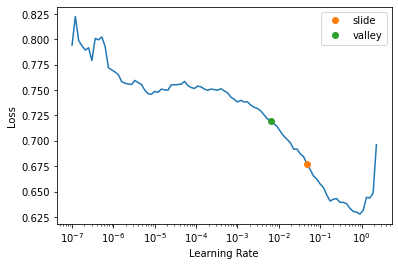

In [31]:
learn.lr_find(suggest_funcs=(slide,valley))

In [35]:
learn.fit(16,lr=0.0063)

epoch,train_loss,valid_loss,accuracy,time
0,0.467391,0.458053,0.782509,00:01
1,0.136461,0.615871,0.747986,00:01
2,0.054097,0.892892,0.752589,00:01
3,0.025202,0.775019,0.772727,00:01
4,0.014484,0.979913,0.765247,00:01
5,0.020907,0.733472,0.777330,00:01
6,0.021986,0.752761,0.781358,00:01
7,0.019737,0.766830,0.775029,00:01
8,0.022842,0.668275,0.775604,00:01
9,0.024032,0.648597,0.769275,00:01


## submit 1

In [36]:
path.ls()

(#3) [Path('spaceship-titanic/test.csv'),Path('spaceship-titanic/sample_submission.csv'),Path('spaceship-titanic/train.csv')]

In [37]:
ss = pd.read_csv(path/'sample_submission.csv')
ss

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [38]:
tst_df = pd.read_csv(path/'test.csv')
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [39]:
tst_dl = learn.dls.test_dl(tst_df)
tst_dl.show_batch()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,#na#,Earth,True,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,27.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
1,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,19.0,0.000007,9.000001e+00,-9.350697e-07,2822.999999,-0.000008
2,#na#,Europa,True,#na#,55 Cancri e,False,#na#,False,False,False,False,False,False,31.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
3,#na#,Europa,False,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,38.0,0.000007,6.652000e+03,-9.350697e-07,181.000000,584.999989
4,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,20.0,10.000000,6.166338e-07,6.350000e+02,0.000010,-0.000008
5,#na#,Earth,False,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,31.0,0.000007,1.615000e+03,2.630000e+02,113.000003,59.999994
6,#na#,Europa,True,#na#,55 Cancri e,False,#na#,False,False,True,False,False,False,21.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
7,#na#,Europa,True,#na#,TRAPPIST-1e,False,#na#,False,False,False,False,False,False,20.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
8,#na#,Europa,True,#na#,55 Cancri e,False,#na#,False,False,False,False,False,False,23.0,0.000007,6.166338e-07,-9.350697e-07,0.000010,-0.000008
9,#na#,Earth,False,#na#,55 Cancri e,False,#na#,False,False,False,False,False,False,24.0,0.000007,6.390000e+02,-9.350697e-07,0.000010,-0.000008


In [40]:
preds,_ = learn.get_preds(dl=tst_dl)

In [45]:
tst_dl.vocab

[False, True]

In [43]:
preds

tensor([[5.6880e-02, 9.4312e-01],
        [9.9966e-01, 3.3623e-04],
        [1.9242e-05, 9.9998e-01],
        ...,
        [1.9659e-04, 9.9980e-01],
        [1.8077e-02, 9.8192e-01],
        [1.6760e-01, 8.3240e-01]])

In [44]:
preds.shape

torch.Size([4277, 2])

In [47]:
preds[:10,1]

tensor([9.4312e-01, 3.3623e-04, 9.9998e-01, 9.8921e-01, 1.0286e-02, 6.5071e-03,
        9.9999e-01, 9.9997e-01, 9.9998e-01, 1.1516e-02])

In [48]:
preds[:10,1]>0.5

tensor([ True, False,  True,  True, False, False,  True,  True,  True, False])

In [52]:
ss.shape

(4277, 2)

In [53]:
tst_df.shape

(4277, 13)

In [58]:
ss.columns

Index(['PassengerId', 'Transported'], dtype='object')

In [59]:
tst_df['Transported'] = (preds[:,1]>0.5)
sub_df = tst_df[['PassengerId', 'Transported']]
sub_df.to_csv('sub.csv', index=False)

In [60]:
!head sub.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


### to kaggle

In [61]:
if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('sub.csv', 'initial basic model', comp)

100%|██████████| 56.8k/56.8k [00:00<00:00, 295kB/s]


### notebook to kaggle

In [65]:
push_notebook??

In [66]:
if not iskaggle:
    push_notebook('victorbahlangene', 'spaceship-titanic',
                  title='Spaceship Titanic',
                  file='Spaceship Titanic.ipynb',
                  path="/content/Spaceship Titanic.ipynb",
                  competition=comp, private=False, gpu=True)

FileExistsError: ignored

# Model 2

## submit 2